通し課題　Day1

In [113]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
import seaborn as sns
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [114]:
#データ読み込み
df_ks=pd.read_csv("ks-projects-201801.csv")

In [115]:
df_ks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [116]:
#データ情報
df_ks.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [117]:
print(df_ks["state"].value_counts())
print(df_ks["category"].value_counts())
print(df_ks["main_category"].value_counts())
print(df_ks["currency"].value_counts())
print(df_ks["country"].value_counts())

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64
Product Design       22314
Documentary          16139
Music                15727
Tabletop Games       14180
Shorts               12357
Video Games          11830
Food                 11493
Film & Video         10108
Fiction               9169
Fashion               8554
Nonfiction            8318
Art                   8253
Apparel               7166
Theater               7057
Technology            6930
Rock                  6758
Children's Books      6756
Apps                  6345
Publishing            6018
Webseries             5762
Photography           5752
Indie Rock            5657
Narrative Film        5188
Web                   5153
Comics                4996
Crafts                4664
Country & Folk        4451
Design                4199
Hip-Hop               3912
Hardware              3663
                     ...  
Couture    

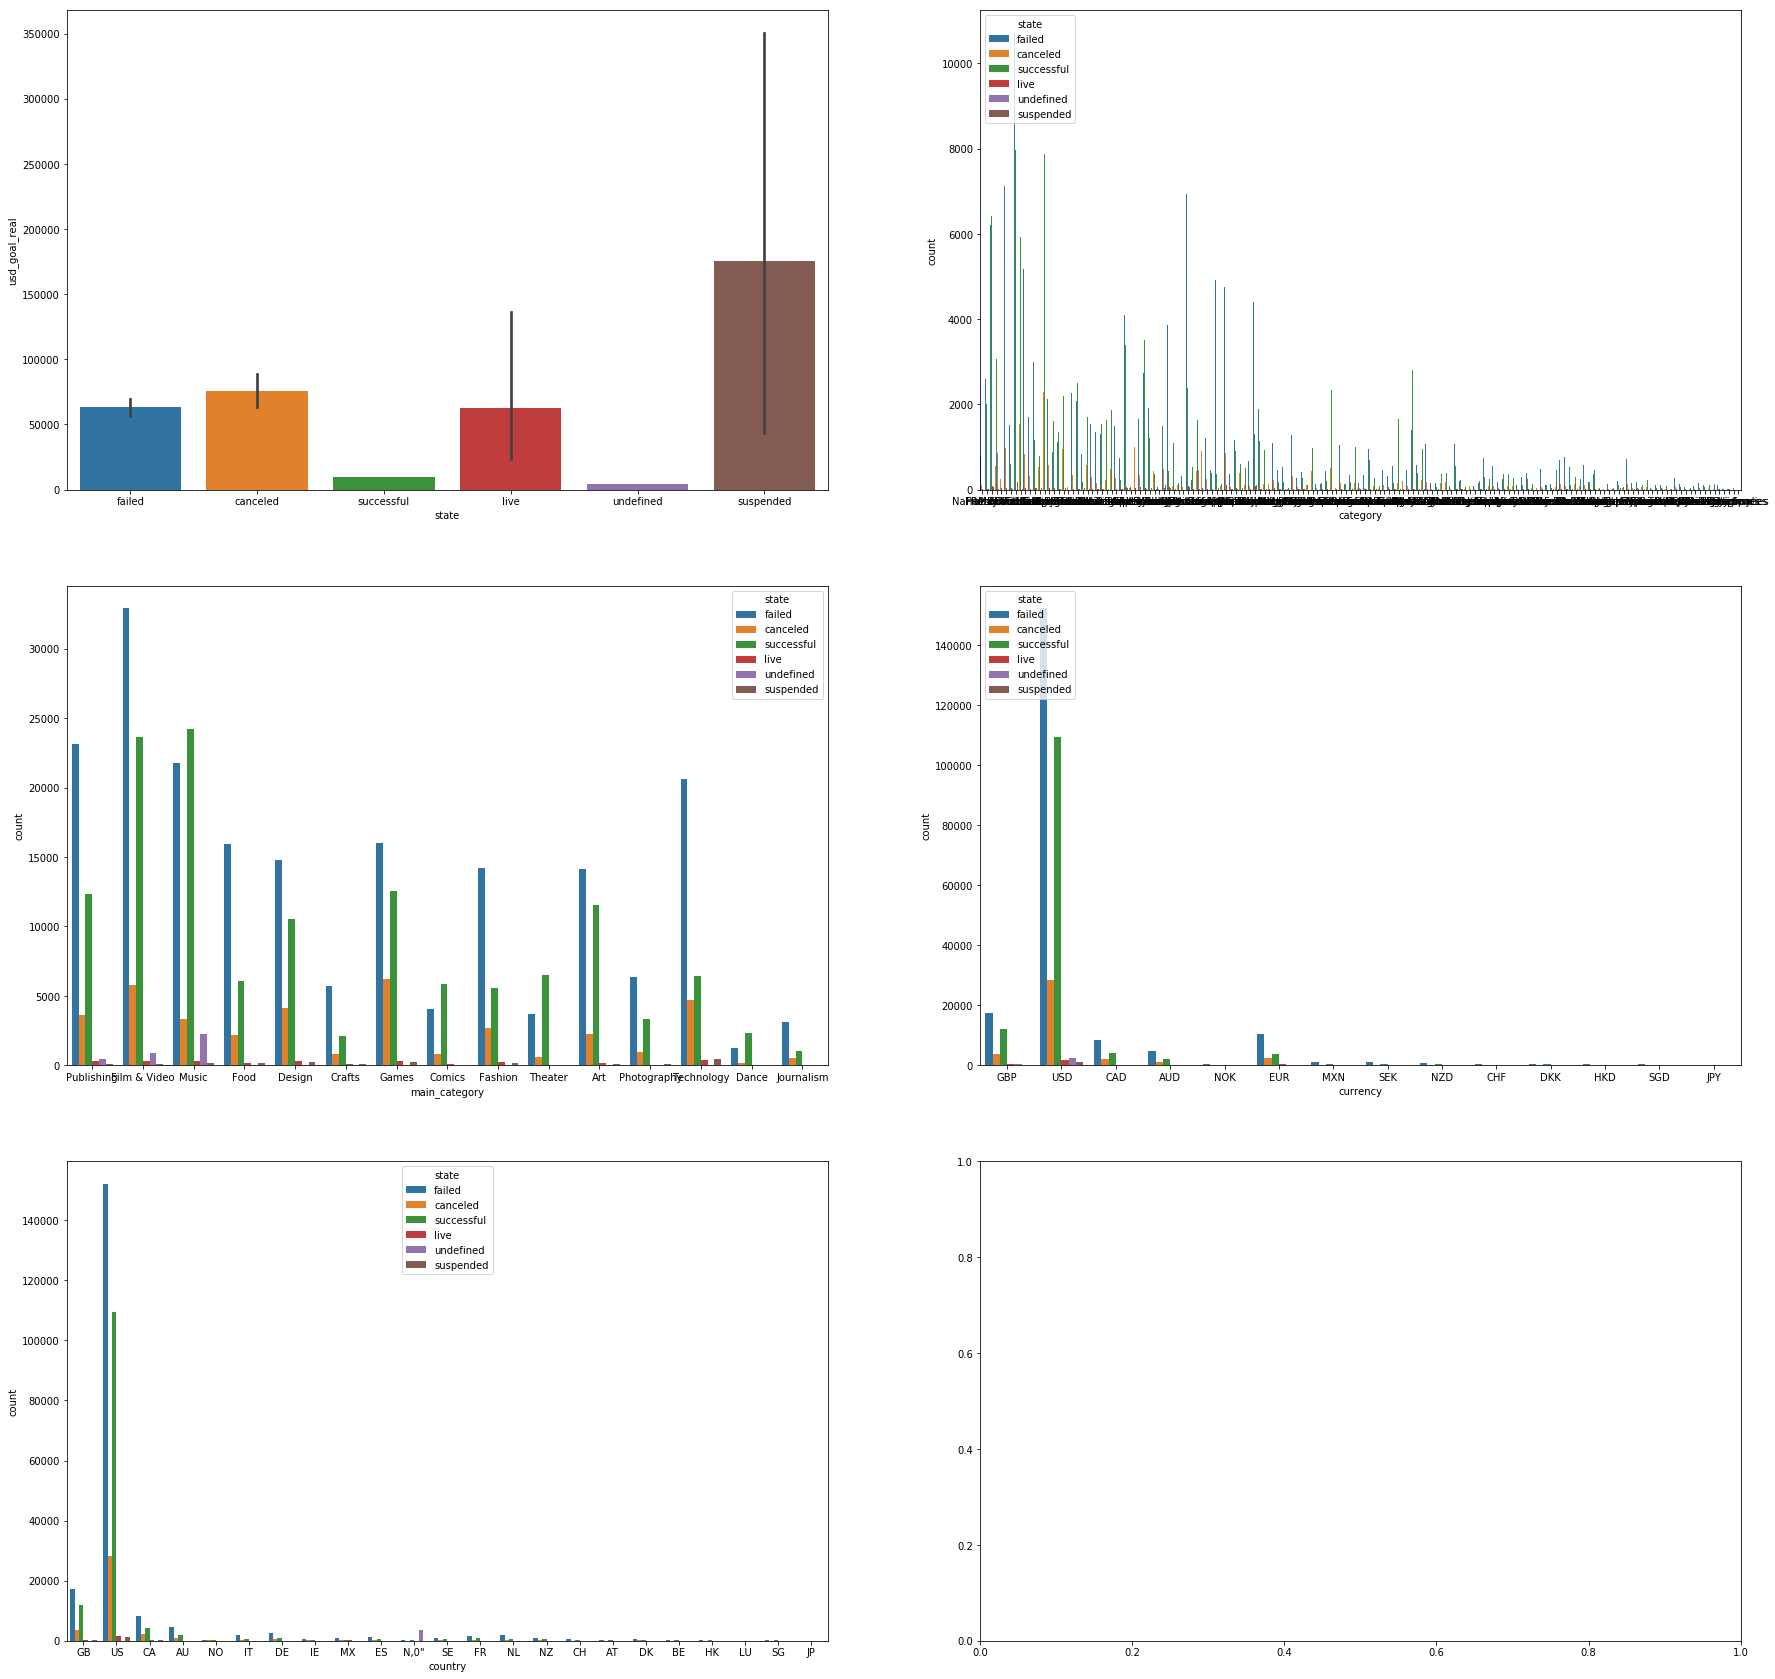

In [118]:
fig,ax=plt.subplots(3,2,figsize=(30,30))
sns.barplot(df_ks.state,df_ks.usd_goal_real,ax=ax[0,0])
sns.countplot(df_ks.category,hue=df_ks.state,ax=ax[0,1])
sns.countplot(df_ks.main_category,hue=df_ks.state,ax=ax[1,0])
sns.countplot(df_ks.currency,hue=df_ks.state,ax=ax[1,1])
sns.countplot(df_ks.country,hue=df_ks.state,ax=ax[2,0])
plt.show()

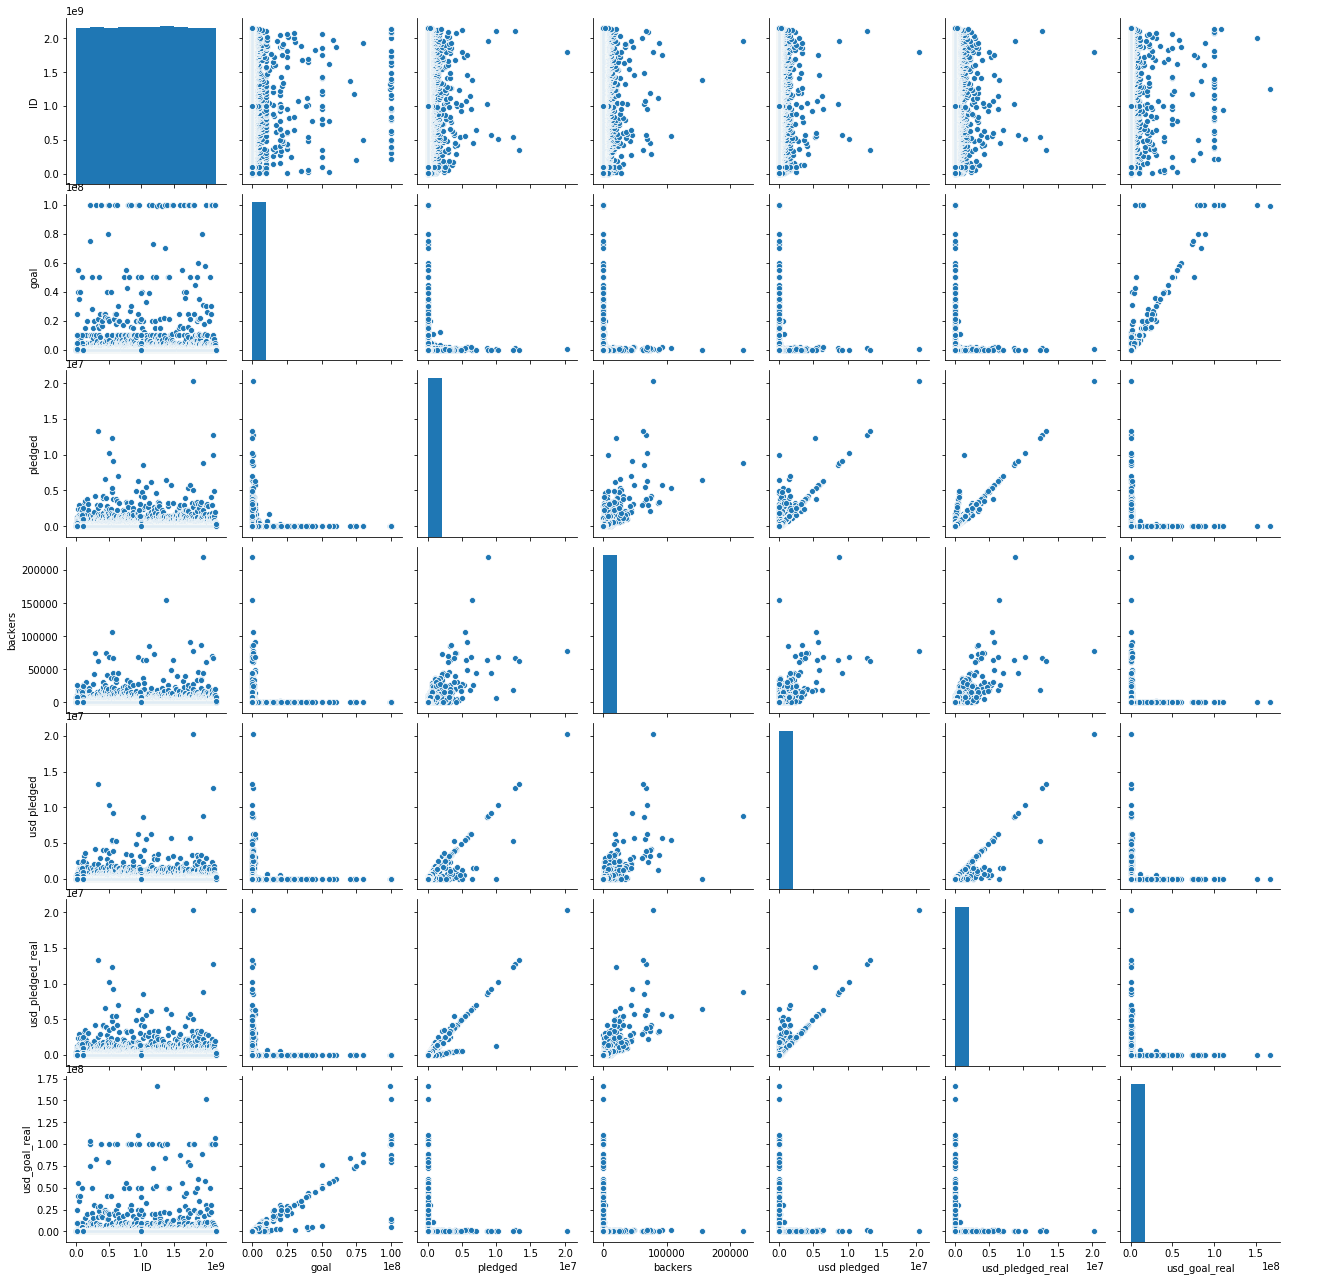

In [119]:
sns.pairplot(df_ks)

In [120]:
#結果が出ているデータのみ抽出
df_ks_pre=df_ks[(df_ks['state']=='successful') | (df_ks['state']=='failed')]
#結果を数値に変換
df_ks_pre.loc[df_ks_pre['state']=='successful','state_num']=1
df_ks_pre.loc[df_ks_pre['state']=='failed','state_num']=0

#予測に使えそうな説明変数を抽出
df_ks_extra=df_ks_pre.loc[:,['state_num','category','main_category','currency','deadline','launched','country','usd_goal_real']]

#質的変数を変換
le=LabelEncoder()
le=le.fit(df_ks_extra['category'])
df_ks_extra['category_label']=le.transform(df_ks_extra['category'])
le=le.fit(df_ks_extra['main_category'])
df_ks_extra['main_category_label']=le.transform(df_ks_extra['main_category'])
le=le.fit(df_ks_extra['currency'])
df_ks_extra['currency_label']=le.transform(df_ks_extra['currency'])
le=le.fit(df_ks_extra['country'])
df_ks_extra['country_label']=le.transform(df_ks_extra['country'])
df_ks_extra


#日付を期間に変換
df_ks_extra['period']=pd.to_datetime(df_ks_extra.loc[:,'deadline'],format='%Y-%m-%d')-pd.to_datetime(df_ks_extra.loc[:,'launched'],format='%Y-%m-%d %H:%M:%S')
df_ks_extra['period']=df_ks_extra['period'].dt.days

#変換した質的変数の列を削除
df_ks_extra=df_ks_extra.drop(columns=['category','main_category','currency','country','deadline','launched'])

df_ks_extra.head()

C:\Users\mura\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\mura\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,state_num,usd_goal_real,category_label,main_category_label,currency_label,country_label,period
0,0.0,1533.95,108,12,5,9,58
1,0.0,30000.00,93,6,13,22,59
2,0.0,45000.00,93,6,13,22,44
3,0.0,5000.00,90,10,13,22,29
5,1.0,50000.00,123,7,13,22,34


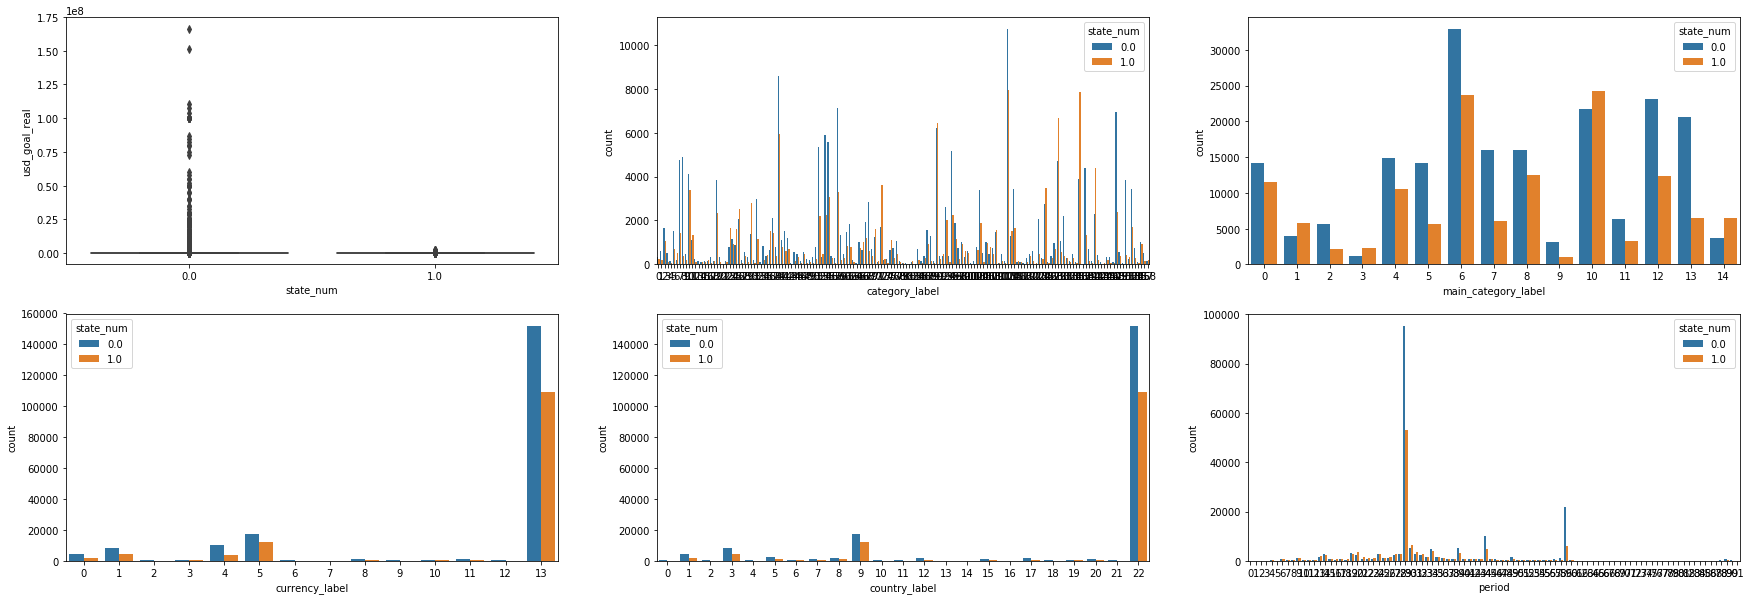

In [121]:
fig,ax=plt.subplots(2,3,figsize=(30,10))
sns.boxplot(df_ks_extra.state_num,df_ks_extra.usd_goal_real,ax=ax[0,0])
sns.countplot(df_ks_extra.category_label,hue=df_ks_extra.state_num,ax=ax[0,1])
sns.countplot(df_ks_extra.main_category_label,hue=df_ks_extra.state_num,ax=ax[0,2])
sns.countplot(df_ks_extra.currency_label,hue=df_ks_extra.state_num,ax=ax[1,0])
sns.countplot(df_ks_extra.country_label,hue=df_ks_extra.state_num,ax=ax[1,1])
sns.countplot(df_ks_extra.period,hue=df_ks_extra.state_num,ax=ax[1,2])
plt.show()

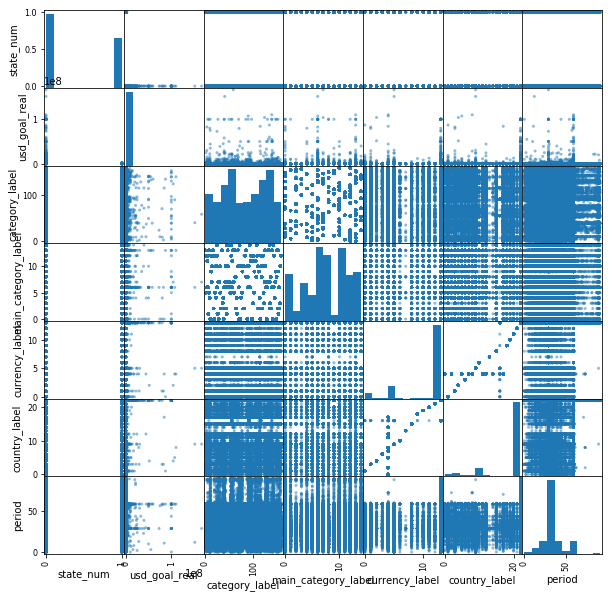

In [122]:
# 散布図行列を書いてみる
pd.plotting.scatter_matrix(df_ks_extra, figsize=(10,10))
plt.show()

In [123]:
# 相関係数を確認
df_ks_extra.corr()

,state_num,usd_goal_real,category_label,main_category_label,currency_label,country_label,period
state_num,1.000000,-0.023735,0.033861,-0.032147,0.059021,0.054805,-0.116437
usd_goal_real,-0.023735,1.000000,0.001101,0.000886,-0.004494,-0.004214,0.021607
category_label,0.033861,0.001101,1.000000,0.199748,-0.009132,-0.009640,-0.003213
main_category_label,-0.032147,0.000886,0.199748,1.000000,-0.011872,-0.010828,0.038525
currency_label,0.059021,-0.004494,-0.009132,-0.011872,1.000000,0.985873,0.029466
country_label,0.054805,-0.004214,-0.009640,-0.010828,0.985873,1.000000,0.030318
period,-0.116437,0.021607,-0.003213,0.038525,0.029466,0.030318,1.000000


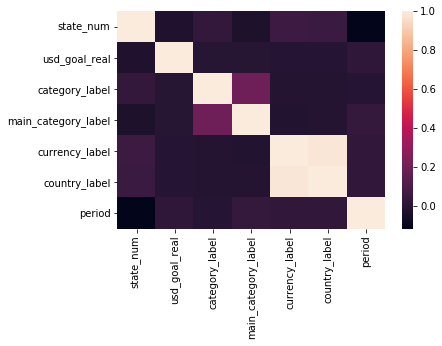

In [124]:
# 相関係数をヒートマップにして可視化
sns.heatmap(df_ks_extra.corr())
plt.show()

In [125]:
#目的変数と説明変数を抽出
y=df_ks_extra.loc[:,['state_num']]
X=df_ks_extra.drop(columns='state_num')

clf=SGDClassifier(loss='log',penalty='none',max_iter=1000,
                 fit_intercept=True,random_state=1234,tol=1e-3)
clf.fit(X,y)

# 重みを取得して表示
w0 = clf.intercept_[0]
w1 = clf.coef_[0, 0]
w2 = clf.coef_[0, 1]
w3 = clf.coef_[0, 2]
w4 = clf.coef_[0, 3]
print("w0 = {:.3f}, w1 = {:.3f}, w2 = {:.3f},w3 = {:.3f},w4 = {:.3f}".format(w0, w1, w2, w3, w4))


C:\Users\mura\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


w0 = 1537.562, w1 = -28007.761, w2 = 2453.082,w3 = 6509.333,w4 = 23227.831


In [126]:
#予測
y_est=clf.predict(X)

#確率値
y_est_proba = clf.predict_proba(X)

#対数尤度
print('対数尤度={:.3f}'.format(-log_loss(y,y_est_proba,normalize=False)))

#正答率
print('正答率={:.3f}%'.format(100*accuracy_score(y,y_est)))

対数尤度=-4605745.832
正答率=59.795%


In [127]:
#予測値と正解のクロス集計
conf_mat=pd.DataFrame(confusion_matrix(y,y_est),
                     index=['正解=failed','正解=successful'],
                     columns=['予測=failed','予測=successful'])
conf_mat

,予測=failed,予測=successful
正解=failed,196639,1080
正解=successful,132270,1686
